#Prachir Agrawal
#Date - 05/25/2020
#Program Manager - Ms. Sushmita Gaur


1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

In [1]:
#Import the libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:

#Import the Dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Check Datatypes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
#statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#shape
df.shape

(5000, 14)

In [6]:
#null values or incorrect imputation
df.isnull().sum()
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#
2.EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings

In [7]:
#Number of unique in each column?
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
pn_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping.
pn_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
pn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [10]:
#Numberof people with zero mortgage?
ln_list = pn_df.query('Mortgage == 0').count()
ln_list['Mortgage']

3462

In [11]:
#Number of people with zero credit card spending per month?
ln_list1 = pn_df.query('CCAvg == 0').count()
ln_list1['CCAvg']

106

In [12]:
#Value counts of all categorical columns.
pn_df['Family'].value_counts(normalize=True).sort_index()

1    0.2944
2    0.2592
3    0.2020
4    0.2444
Name: Family, dtype: float64

In [13]:
pn_df['Education'].value_counts(normalize=True).sort_index()

1    0.4192
2    0.2806
3    0.3002
Name: Education, dtype: float64

In [14]:
pn_df['Personal Loan'].value_counts(normalize=True).sort_index()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [15]:
pn_df['Securities Account'].value_counts(normalize=True).sort_index()

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [16]:
pn_df['CD Account'].value_counts(normalize=True).sort_index()

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [17]:
pn_df['Online'].value_counts(normalize=True).sort_index()

0    0.4032
1    0.5968
Name: Online, dtype: float64

In [18]:
pn_df['CreditCard'].value_counts(normalize=True).sort_index()

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [19]:
pn_df.query('Experience < 0')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [20]:
#There are annomilies in Experience column with minus values. 

#pn_df.loc[pn_df['Experience'] < 0, 'Experience'] = 1

pn_df['Experience'] = pn_df['Experience'].abs()


In [21]:
pn_df.query('Experience < 0')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


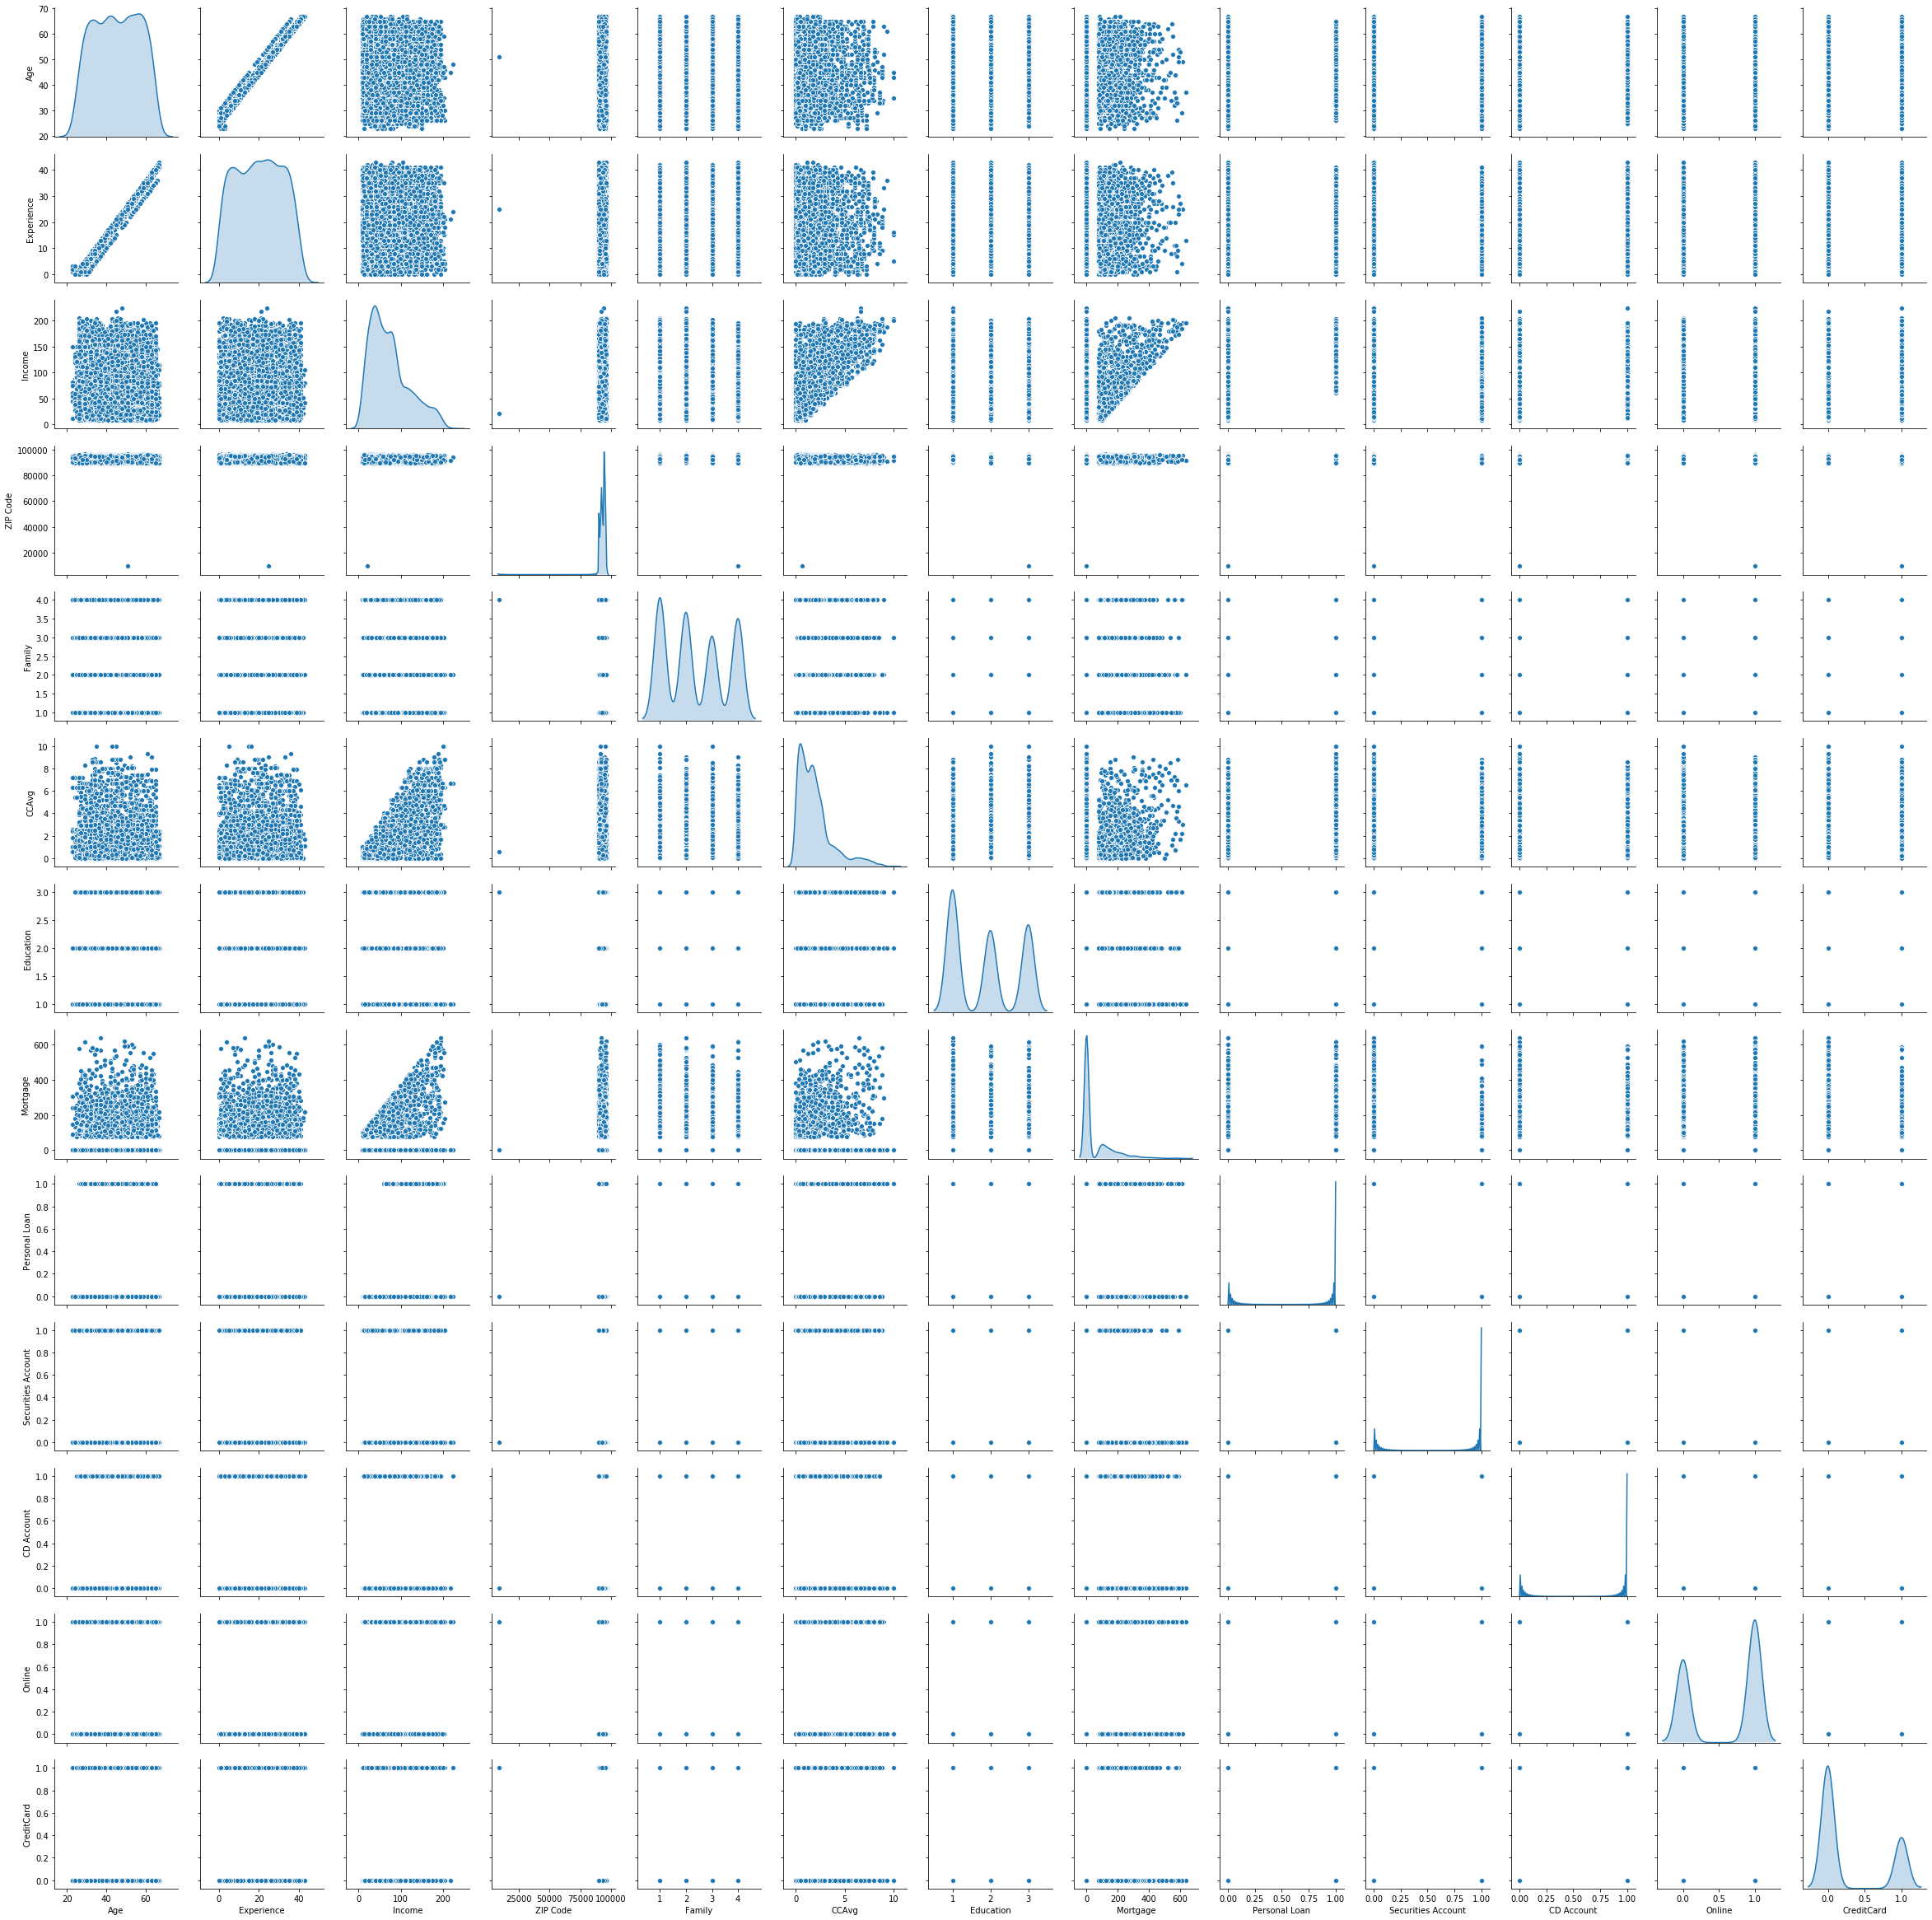

In [22]:
sns.pairplot(pn_df, diag_kind='kde')
plt.show()

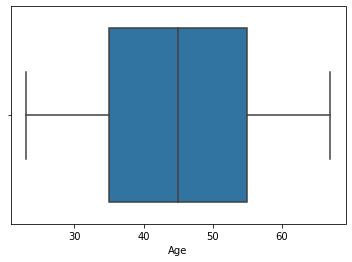

In [23]:
sns.boxplot(pn_df['Age'])
plt.show()

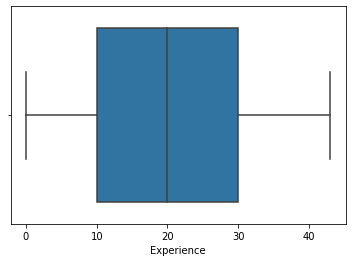

In [24]:
sns.boxplot(pn_df['Experience'])
plt.show()

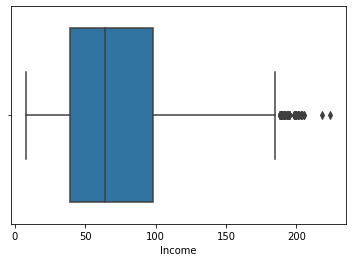

In [25]:
sns.boxplot(pn_df['Income'])
plt.show()

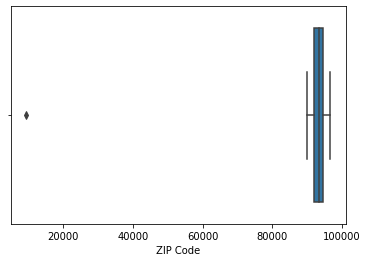

In [26]:
sns.boxplot(pn_df['ZIP Code'])
plt.show()

In [27]:
# Zip code is not relevant so removing this column
pn_df = pn_df.drop('ZIP Code', axis =1 )
pn_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


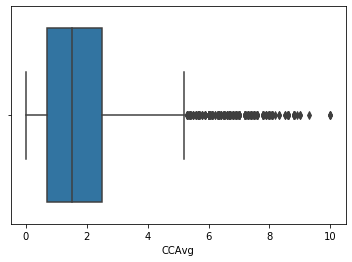

In [28]:
sns.boxplot(pn_df['CCAvg'])
plt.show()

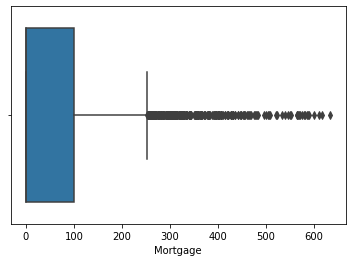

In [29]:
sns.boxplot(pn_df['Mortgage'])
plt.show()

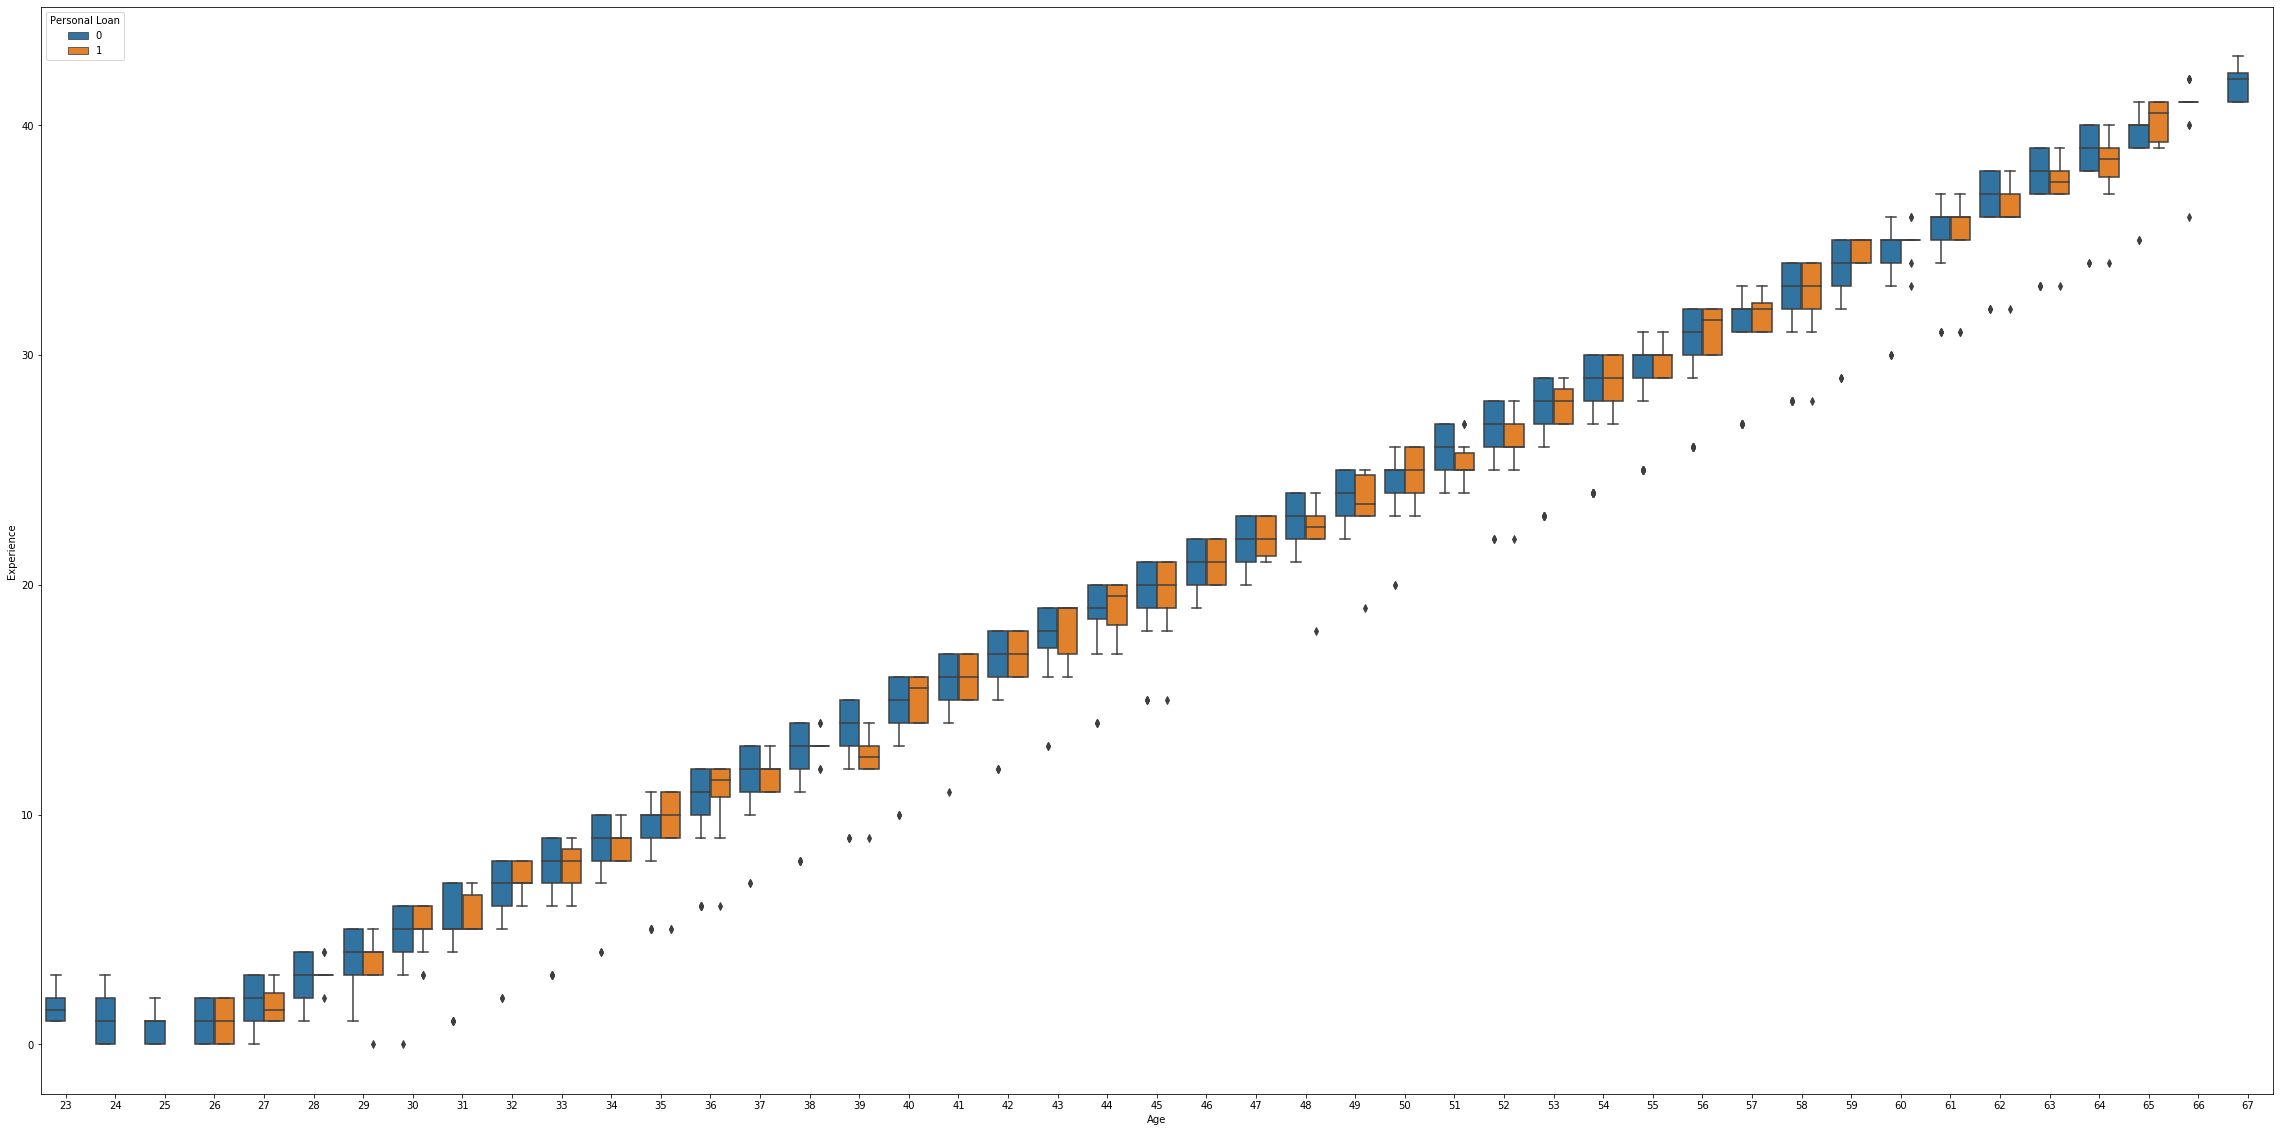

In [30]:
plt.figure(figsize=(40,20))
sns.boxplot(x="Age",y="Experience",data=pn_df,hue="Personal Loan")
plt.show()


In [31]:
#Age and Experience columns are highly correlated hence deleting Age column
pn_df.corr()
pn_df = pn_df.drop('Experience', axis =1 )
pn_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [32]:
#Lets analysze the distribution of the various attribute
pn_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [33]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
pn_df.groupby(["Personal Loan"]).mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [34]:
#Convert X & Y variable to a categorical variable as relevant
pn_df['Personal Loan'] = pn_df['Personal Loan'].astype('category')
pn_df['Family'] = pn_df['Family'].astype('category')
pn_df['Education'] = pn_df['Education'].astype('category')
pn_df['Securities Account'] = pn_df['Securities Account'].astype('category')
pn_df['CD Account'] = pn_df['CD Account'].astype('category')
pn_df['Onlinet'] = pn_df['Online'].astype('category')
pn_df['CreditCard'] = pn_df['CreditCard'].astype('category')


In [35]:
pn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null int64
CreditCard            5000 non-null category
Onlinet               5000 non-null category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.4 KB


In [36]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = pn_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [37]:
## Define X and Y variables
X = pn_df.drop('Personal Loan', axis=1)
Y = pn_df[['Personal Loan']]

In [38]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [39]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [40]:
pn_df.corr()

,Age,Income,CCAvg,Mortgage,Online
Age,1.000000,-0.055269,-0.052012,-0.012539,0.013702
Income,-0.055269,1.000000,0.645984,0.206806,0.014206
CCAvg,-0.052012,0.645984,1.000000,0.109905,-0.003611
Mortgage,-0.012539,0.206806,0.109905,1.000000,-0.005995
Online,0.013702,0.014206,-0.003611,-0.005995,1.000000


In [41]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()



Optimization terminated successfully.
         Current function value: 0.107513
         Iterations 10


In [42]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.6565
Time:                        21:56:01   Log-Likelihood:                -376.30
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.458e-300
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.5484      0.839    -16.143      0.000     -15.193     -11.903
Age                      0.0052      0.009      0.607      0.544      -0.012       0.022
Income      

#Interpretation of Pseudo R^2

A pseudo R^2 of 66% indicates that 66% of the uncertainty of the intercept only model is explained by the full model

In [43]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [44]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.27,71.26,0.99,0.00
Education_2,4.00,54.81,0.98,0.00
CD Account_1,3.71,40.84,0.98,0.00
Family_3,2.49,12.05,0.92,0.00
Family_4,1.64,5.17,0.84,0.00
CCAvg,0.25,1.28,0.56,0.00
Income,0.06,1.06,0.52,0.00
CreditCard_1,-1.00,0.37,0.27,0.00
Securities Account_1,-1.07,0.34,0.26,0.01
const,-13.55,0.00,0.00,0.00


#Model building using Logistic Regression from Sklearn
We will use the sklearn library to build the model and make predictions

In [45]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_predict = logreg.predict(X_test)

In [47]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [48]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9602857142857143

Testing accuracy 0.9493333333333334

Recall: 0.5503355704697986

Precision: 0.9010989010989011

F1 Score: 0.6833333333333333

Roc Auc Score: 0.7718369192097327


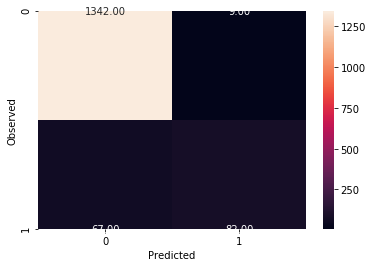

In [49]:
draw_cm(y_test,y_predict)

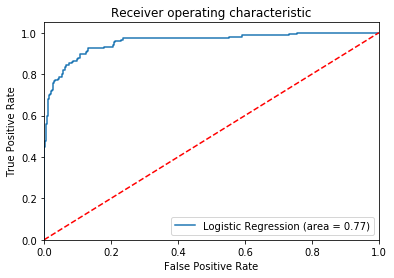

In [50]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.961, 0.955, 0.959, 0.898, 0.896]

[0.952, 0.951, 0.949, 0.893, 0.891]


In [53]:
model = LogisticRegression(random_state=42,penalty='l1')  # changing penalty to l1

model.fit(X_train, y_train)

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))   

Trainig accuracy 0.9622857142857143

Testing accuracy 0.9553333333333334


In [54]:
model = LogisticRegression(random_state=42,penalty='l1',class_weight=None) # changing class weight to None

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9622857142857143

Testing accuracy 0.9553333333333334


In [55]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', class_weight=None, C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.895, 0.955, 0.959, 0.962, 0.962, 0.962]

[0.891, 0.943, 0.95, 0.953, 0.955, 0.955]


Trainig accuracy 0.9622857142857143

Testing accuracy 0.9546666666666667

Confusion Matrix


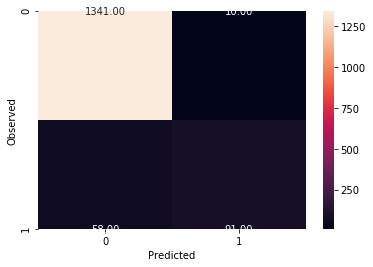

None

Recall: 0.610738255033557

Precision: 0.900990099009901

F1 Score: 0.7280000000000001

Roc Auc Score: 0.8016681652665933


In [56]:
#Therefore final model is with all the parameters 
model = LogisticRegression(random_state=42,penalty='l1', class_weight=None,C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [57]:
# !pip install yellowbrick

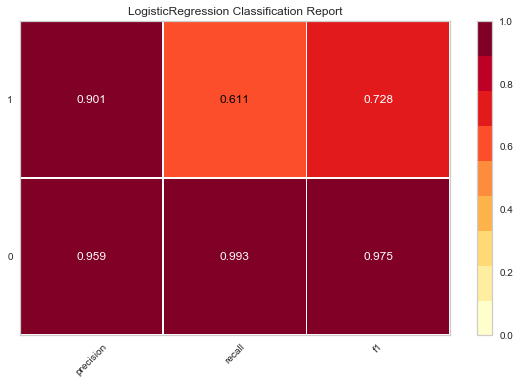

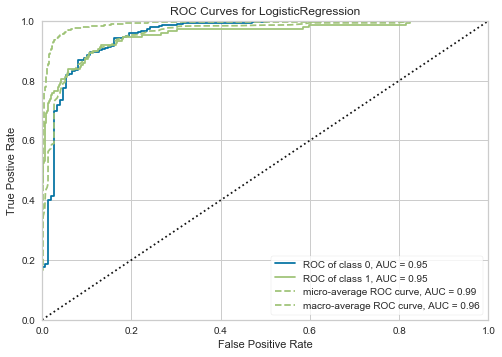

In [58]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [59]:
#Give Business understanding of your model:-
#1. Customers who dont have Securities Account and Creditcard having more probabilities to go for the Personal Loan.
#2. Families more than 2 are having more probabilities to opt Personal Loan.
#3. Education 2,3 and cd account 1 are having more probabilities to opt Personal Loan.